In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore") # importing of the Libraries i'm using

In [4]:
df = pd.read_excel(r"C:\Users\Oabile Moroka\Downloads\churn_real.xlsx")  #loading the dataset using raw string
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
# convert the total charges column to numeric

In [4]:
summary_stats = df.describe().drop('count')
styled_stats = summary_stats.style\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(cmap='YlGnBu')\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}])
styled_stats


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


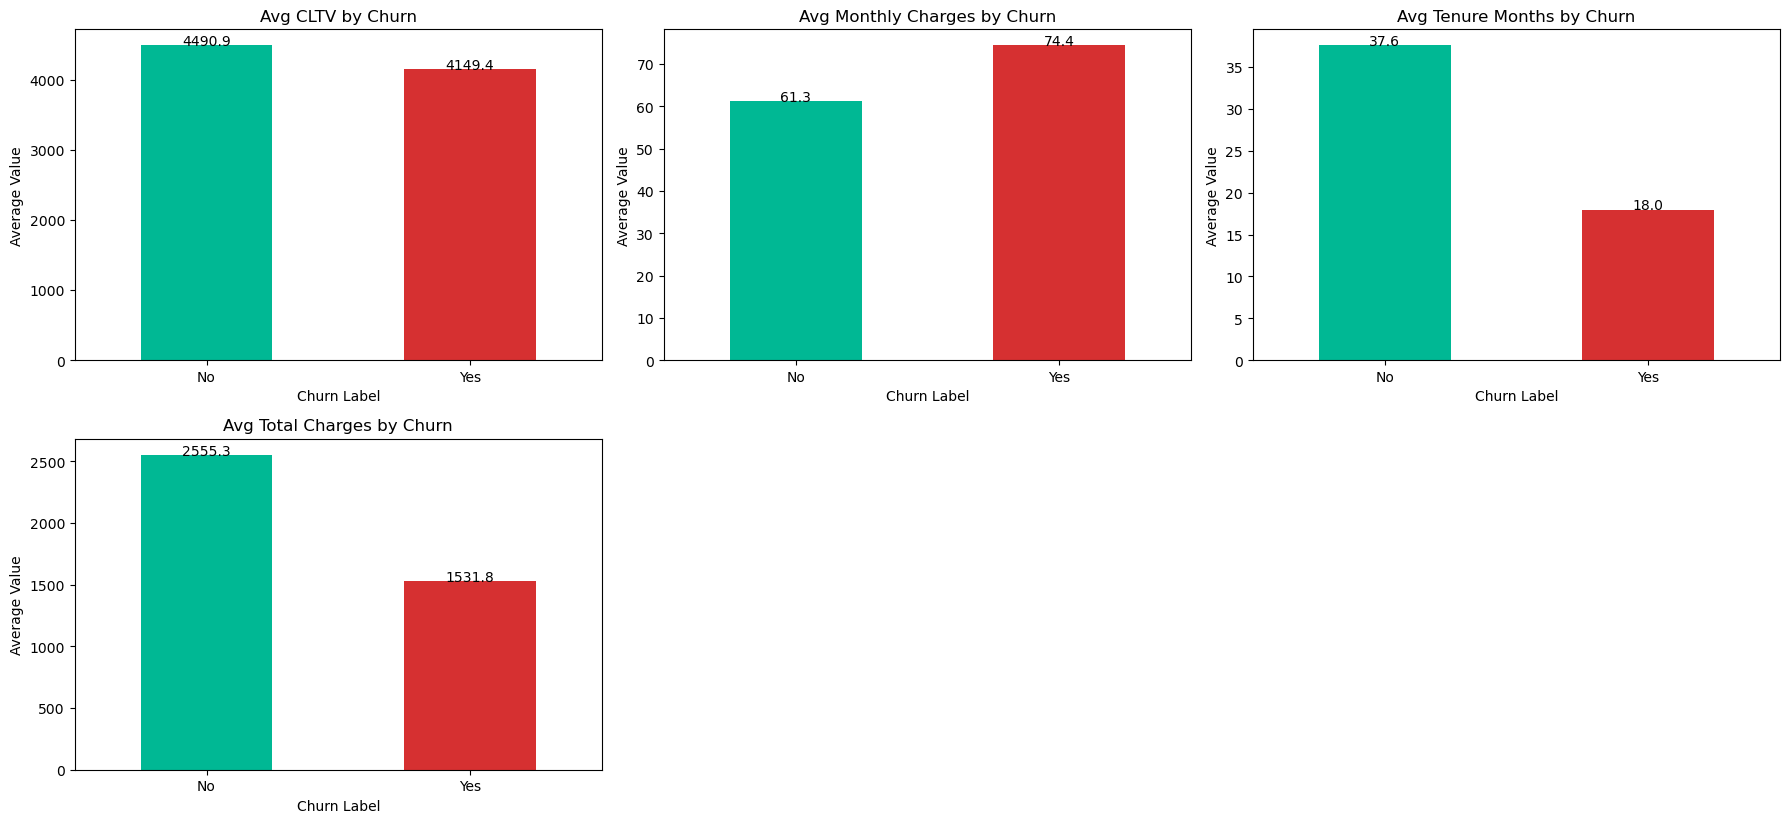

In [5]:
#  Excluding only irrelevant numeric columns
excluded_columns = ["Churn Value", "Latitude", "Longitude", "Churn Score", "Count", "Zip Code"]
numeric_columns = df.select_dtypes(include='number').columns.difference(excluded_columns)

# Grouping by 'Churn Label' and compute mean
churn_avg = df.groupby('Churn Label')[numeric_columns].mean()

# Plotting setup
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # 3x3 to allow space for more plots
axes = axes.flatten()

# Bar plots for each numeric feature
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    churn_avg[column].plot(kind='bar', ax=ax, color=['#00b894', '#d63031'])
    ax.set_title(f"Avg {column} by Churn", fontsize=12)
    ax.set_ylabel('Average Value')
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

    # Annotate bars with values
    for idx, val in enumerate(churn_avg[column]):
        ax.text(idx, val + 0.05, f'{val:.1f}', ha='center', fontsize=10)

# Hide unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#Bar plots of numeric features excluding irrelevant ones (my summary comment)

PART A(f) Insights on the visualization

From the visualization of numeric features, it is evident that customers with shorter Tenure Months have a significantly higher likelihood of churning compared to long-term customers. This suggests that early dissatisfaction service expectations, or weak onboarding experiences contribute to early stage customer churn. Furthermore, the Monthly Charges are noticeably higher for customers who churned, showing that customers paying premium rates are more sensitive to cost or perceive a mismatch between price and value. Meanwhile, Customer Lifetime Value (CLTV) is lower on average among customers who churn, implying that customers who see less future value in staying are more likely to terminate services early. These findings highlight the importance of improving customer onboarding, reviewing pricing strategies, and increasing the perceived long-term value for customers. Strategic interventions such as early loyalty incentives, better customer education about service benefits, flexible billing packages, and stronger customer engagement during the first few months could effectively reduce churn rates.



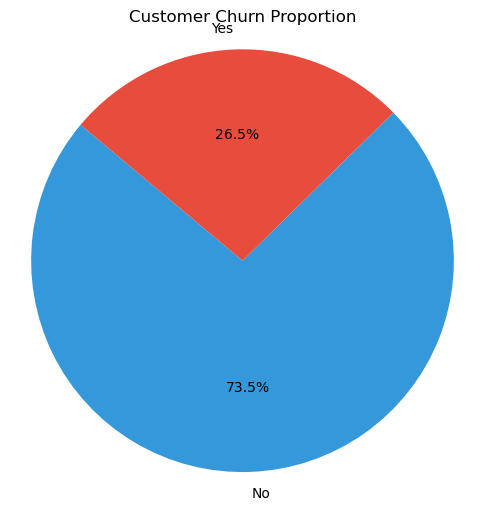

In [6]:
churn_counts = df['Churn Label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['#3498db', '#e74c3c'])
plt.title('Customer Churn Proportion')
plt.axis('equal')
plt.show()
#Pie chart forProportion of churned customers

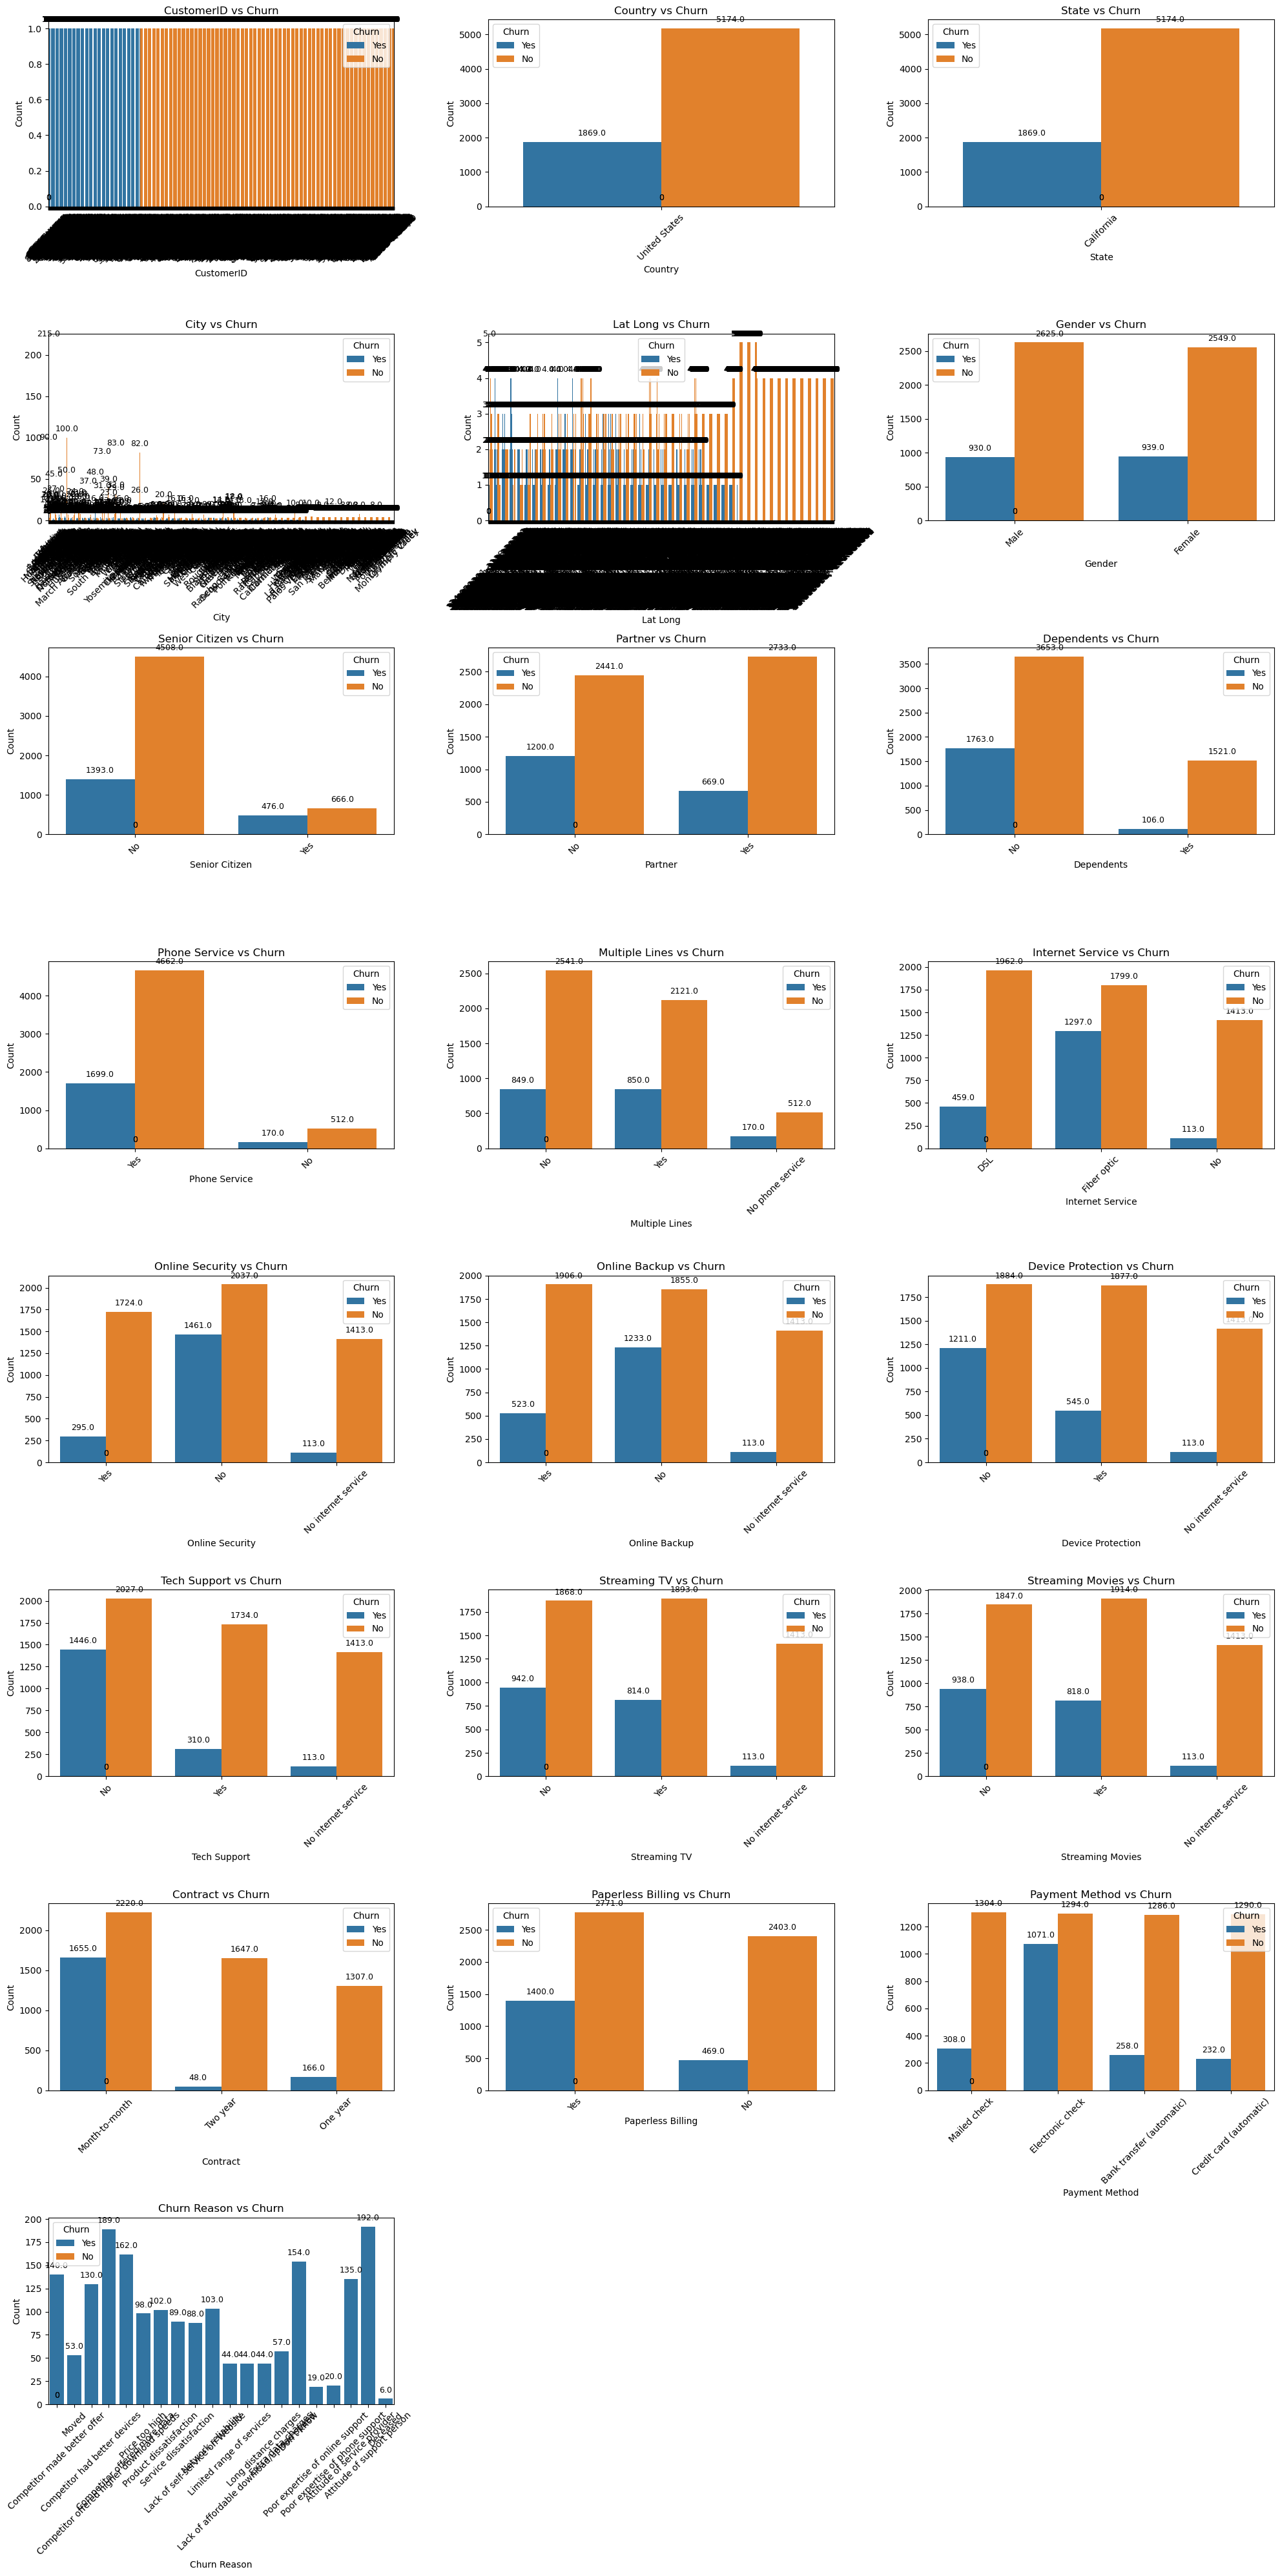

In [7]:

possible_cat_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label'
]
for col in possible_cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Selecting categorical columns (object type), excluding the target
categorical_cols = df.select_dtypes(include='object').columns.drop('Churn Label')

# Creating subplot layout
n_cols = 3
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

#Ploting each categorical variable
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Churn Label', ax=ax)
    ax.set_title(f"{col} vs Churn", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Churn")
    ax.tick_params(axis='x', rotation=45)

    # Annotate each bar with its count
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, 
                    color='black', xytext=(0, 5), textcoords='offset points')

# Hide unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
churn_reasons = df['Churn Reason'].value_counts().reset_index()
churn_reasons.columns = ['Churn Reason', 'Frequency']
churn_reasons['Percentage'] = (churn_reasons['Frequency'] / churn_reasons['Frequency'].sum()) * 100
churn_reasons['Percentage'] = churn_reasons['Percentage'].map("{:.2f}%".format)
churn_reasons
# Frequency and percentage of each churn reason 

,Churn Reason,Frequency,Percentage
0,Attitude of support person,192,10.27%
1,Competitor offered higher download speeds,189,10.11%
2,Competitor offered more data,162,8.67%
3,Don't know,154,8.24%
4,Competitor made better offer,140,7.49%
5,Attitude of service provider,135,7.22%
6,Competitor had better devices,130,6.96%
7,Network reliability,103,5.51%
8,Product dissatisfaction,102,5.46%
9,Price too high,98,5.24%


 Top 3 churn influencers and interventions

From the churn reason analysis, the top 3 churn drivers are as folloes:

1.Competitor Offer – Customers are swayed by better offers elsewhere.

2.Customer Service Issues – Poor experiences with support.

3.Billing Issues – Complicated or unexpected billing.


Interventions:
Introduce retention offers and personalized discounts to counter competitor pricing.

Upskill customer service teams and reduce resolution time.

Ensure transparent billing and proactive notifications about changes or charges.
s

PART B

In [9]:
# Check for missing values in all columns
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
mode_total_charges = df['Total Charges'].mode()[0]
df['Total Charges'].fillna(mode_total_charges, inplace=True)


           Feature  Skewness
0    Tenure Months  0.239540
1            Count  0.000000
2  Monthly Charges -0.220524
3         Zip Code -0.251463
4             CLTV -0.311602


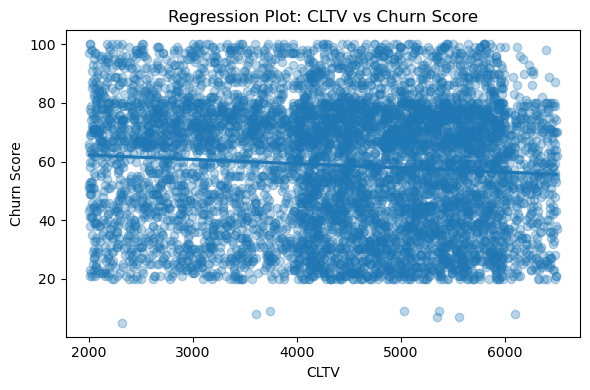

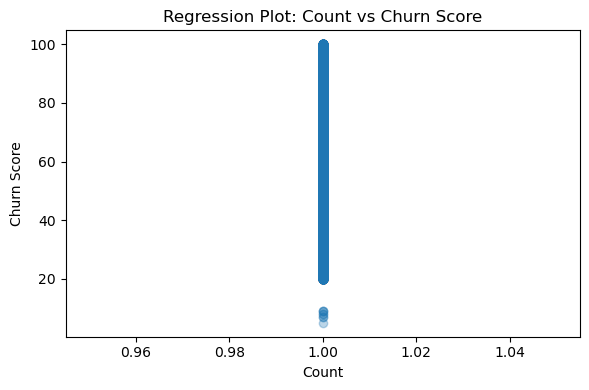

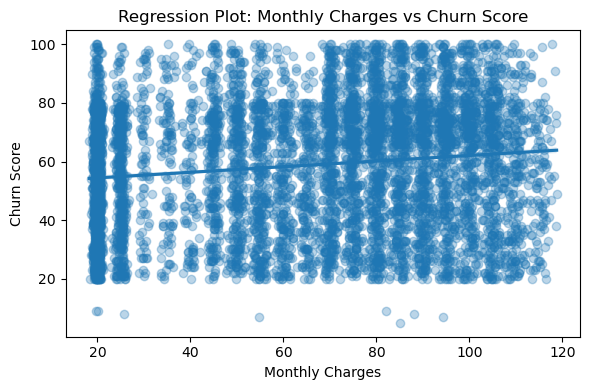

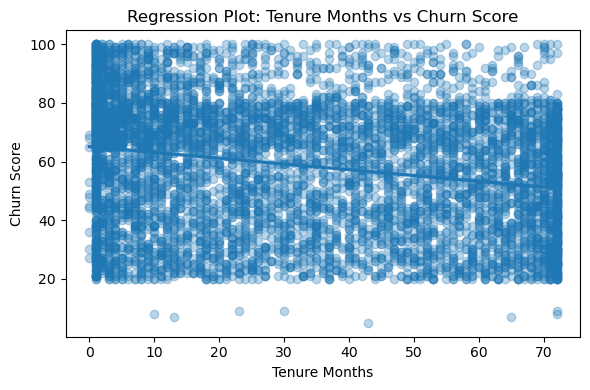

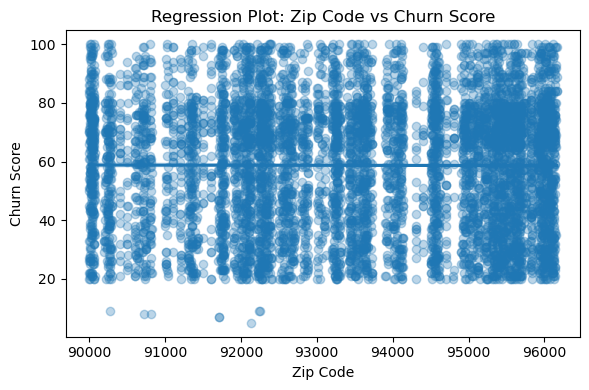

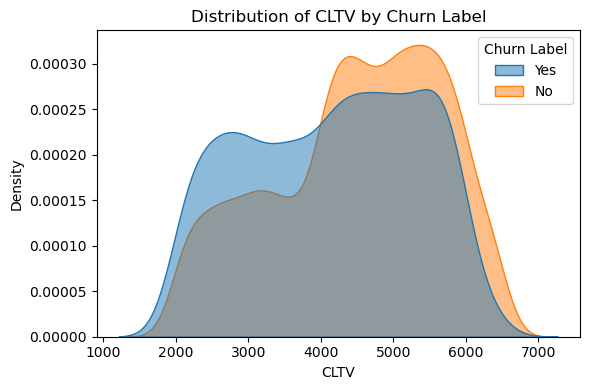

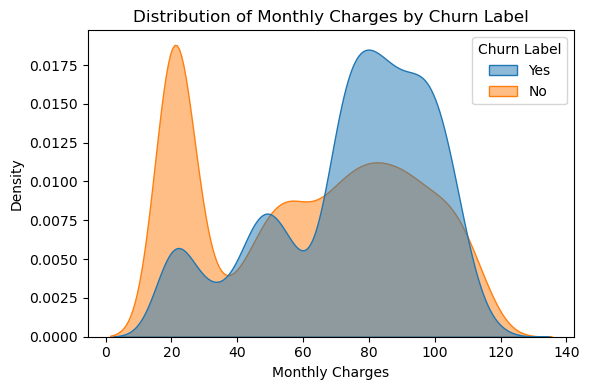

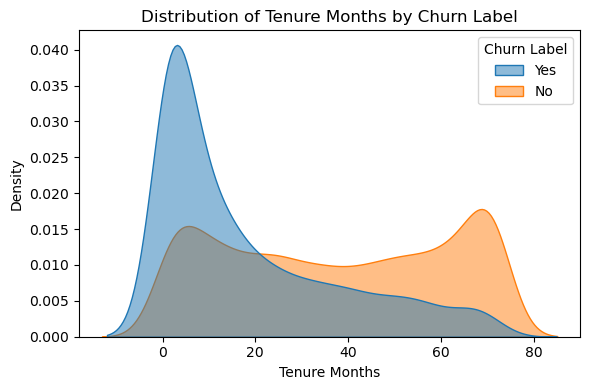

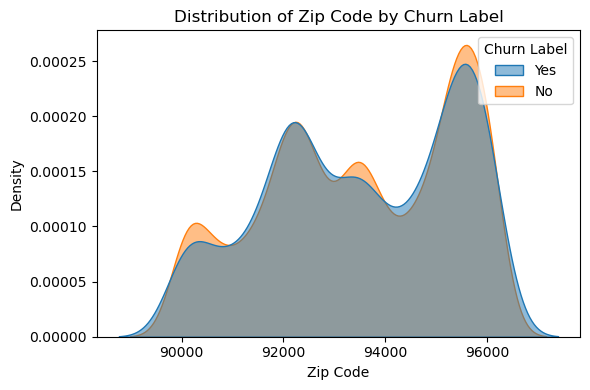

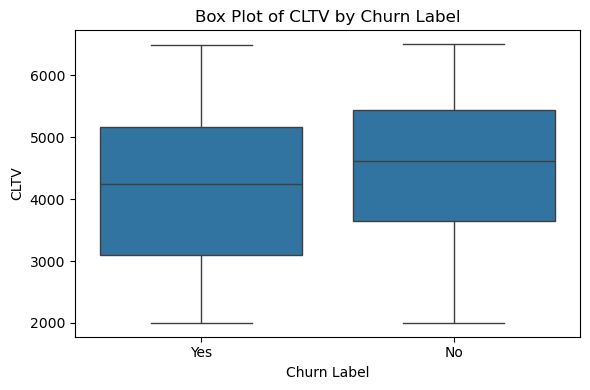

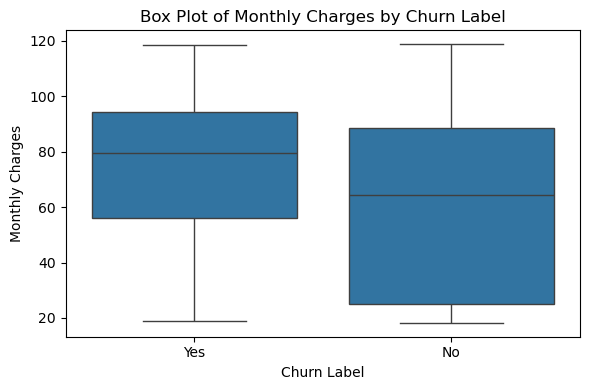

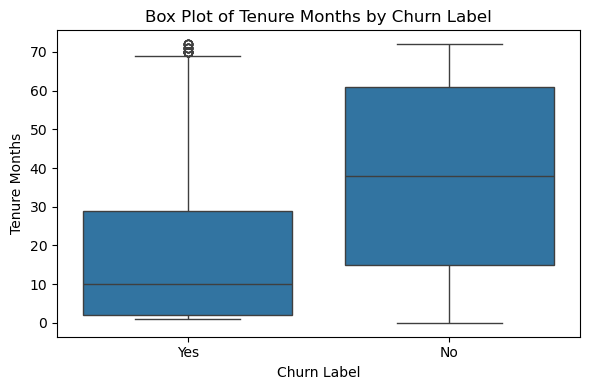

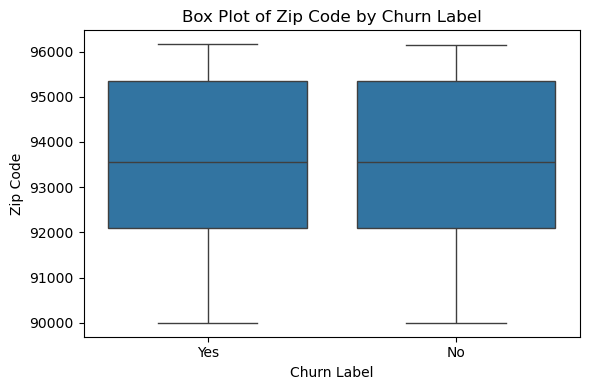

In [8]:
import pandas as pdkimport seaborn as sns
import matplotlib.pyplot as plt

# Exclude irrelevant numeric columns
excluded_columns = ['Latitude', 'Longitude', 'Churn Value', 'Churn Score']
numeric_cols = df.select_dtypes(include='number').columns.difference(excluded_columns)

# Check skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
print(skew_df)

# Regression plots vs 'Churn Score'
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[col], y=df['Churn Score'], scatter_kws={'alpha': 0.3})
    plt.title(f'Regression Plot: {col} vs Churn Score')
    plt.tight_layout()
    plt.show()

# KDE plots by 'Churn Label' (only if column has more than one unique value)
for col in numeric_cols:
    if df[col].nunique() > 1:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=df, x=col, hue='Churn Label', fill=True, common_norm=False, alpha=0.5)
        plt.title(f'Distribution of {col} by Churn Label')
        plt.tight_layout()
        plt.show()

# Box plots for outlier detection (only if column has more than one unique value)
for col in numeric_cols:
    if df[col].nunique() > 1:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='Churn Label', y=col)
        plt.title(f'Box Plot of {col} by Churn Label')
        plt.tight_layout()
        plt.show()


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import skew

#This will  Convert relevant columns to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Excluding columns that shouldn't be transformed
excluded_cols = ['Latitude', 'Longitude', 'Churn Value', 'Churn Score', 'Zip Code', 'Count']
numeric_cols = df.select_dtypes(include='number').columns.difference(excluded_cols)

#Calculate skewness and identify highly skewed features
skewness_before = df[numeric_cols].skew().sort_values(ascending=False)
highly_skewed = skewness_before[(skewness_before > 0.8) | (skewness_before < -0.8)]

print("Skewness before transformation:")
print(skewness_before)

#Apply log1p transformation to highly skewed features
for col in highly_skewed.index:
    df[f'{col}_log'] = np.log1p(df[col])

#Check skewness after transformation
log_transformed_cols = [f'{col}_log' for col in highly_skewed.index]
skewness_after = df[log_transformed_cols].skew().sort_values(ascending=False)

print("\nSkewness after transformation:")
print(skewness_after)


Skewness before transformation:
Total Charges      0.961642
Tenure Months      0.239540
Monthly Charges   -0.220524
CLTV              -0.311602
dtype: float64

Skewness after transformation:
Total Charges_log   -0.743089
dtype: float64


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# i) Relationship between Phone Service and Churn
# H0: No significant relationship
# H1: Significant relationship

# Create contingency table
phone_churn_table = pd.crosstab(df['Phone Service'], df['Churn Label'])

# Perform Chi-Square test
chi2_1, p1, dof_1, ex_1 = chi2_contingency(phone_churn_table)

print("i) Phone Service vs Churn")
print(f"Chi-square p-value: {p1:.4f}")
if p1 < 0.05:
    print("→ Reject H0: Significant relationship between Phone Service and Churn.\n")
else:
    print("→ Fail to reject H0: No significant relationship.\n")

# ii) Relationship between Contract Type and Churn
# H0: Contract type does not influence churn
# H1: Contract type significantly influences churn

# Contingency table
contract_churn_table = pd.crosstab(df['Contract'], df['Churn Label'])

# Chi-Square test
chi2_2, p2, dof_2, ex_2 = chi2_contingency(contract_churn_table)

print("ii) Contract Type vs Churn")
print(f"Chi-square p-value: {p2:.4f}")
if p2 < 0.05:
    print("→ Reject H0: Contract type significantly affects churn.\n")
else:
    print("→ Fail to reject H0: No significant effect.\n")

# iii) Relationship between Senior Citizen and Churn
# H0: Senior Citizen status does not affect churn
# H1: Senior Citizen status significantly affects churn

# Contingency table
senior_churn_table = pd.crosstab(df['Senior Citizen'], df['Churn Label'])

# Chi-Square test
chi2_3, p3, dof_3, ex_3 = chi2_contingency(senior_churn_table)

print("iii) Senior Citizen vs Churn")
print(f"Chi-square p-value: {p3:.4f}")
if p3 < 0.05:
    print("→ Reject H0: Senior status significantly affects churn.")
else:
    print("→ Fail to reject H0: No significant effect.")


i) Phone Service vs Churn
Chi-square p-value: 0.3388
→ Fail to reject H0: No significant relationship.

ii) Contract Type vs Churn
Chi-square p-value: 0.0000
→ Reject H0: Contract type significantly affects churn.

iii) Senior Citizen vs Churn
Chi-square p-value: 0.0000
→ Reject H0: Senior status significantly affects churn.


In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [8]:

# Select columns to normalize
columns_to_normalize = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Initialize scaler
scaler = MinMaxScaler()

# Normalize selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Preview the result
df[columns_to_normalize].head()



,Tenure Months,Monthly Charges,Total Charges
0,0.027778,0.354229,0.010310
1,0.027778,0.521891,0.015330
2,0.111111,0.809950,0.092511
3,0.388889,0.861194,0.349325
4,0.680556,0.850249,0.578987


In [9]:

df_model = df.copy()

# Encode categorical columns including target 'Churn Label'
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Defining features (X) and target (y)
X = df_model.drop('Churn Label', axis=1)
y = df_model['Churn Label']

# Spliting into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [10]:

# Handle missing values using imputation (median strategy)
imputer = SimpleImputer(strategy='median')

# Apply imputation to training and testing data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, solver='liblinear')

In [32]:
# Predict using test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1009
           1       1.00      0.92      0.96       400

    accuracy                           0.98      1409
   macro avg       0.99      0.96      0.97      1409
weighted avg       0.98      0.98      0.98      1409



In [33]:
# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1009    0]
 [  31  369]]





### Interpretation of Confusion Matrix

- **True Positives (TP** Churned customers correctly identified.
- **True Negatives (TN):** Non-churned customers correctly identified.
- **False Positives (FP):** Customers incorrectly predicted as churned.
- **False Negatives (FN):** Customers incorrectly predicted as retained.

The model performs well in predicting customer churn, especially for retained customers. However, the false negatives should be minimized in future models, as missing actual churners can cost the business. Additional features or advanced models like Random Forest may improve this.
